<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Day4_Example2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day4_Example2

***
### Introduction
The purpose of this assignment is to calculate a suite of classification model performance metrics via Python code functions that you
create and then comparing our results to those of pre-built Python functions that automatically calculate those same metrics. 

#### The data set has three key columns we will use:
1. class: the actual classification for the observation
2. scored.class: the predicted classification for the observation (can only be ‘0’ or ‘1’; identified by comparing the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation against a 0.50 threshold))
3. scored.probability: the classification model’s probability score (i.e., the likelihood that the correct classification for an observation is a ‘1’) for the observation


In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

### 1, 2) Load data

In [ ]:
# read datasource from Github
df = pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day4/Day4%20Data.csv")
# To display the top 5 rows
df.head()


,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491


***
### 3) Use Pandas’ `crosstab()` function to calculate the contents of a confusion matrix for the data.

`df['class']` is the actual classification for the observation.

`df['scored.class']` is the predicted classification for the observation.


In [ ]:
# use the crosstab() function to show the contents of a confusion matrix
cm = pd.crosstab(df['class'], df['scored.class'], rownames=['Actual'], colnames=['Predicted'], margins=True)
cm


Predicted,0,1,All
Actual,,,
0,119,5,124
1,30,27,57
All,149,32,181


>1. For the output of confusion matrix, the rows represent the actual classification and the columns represent the predicted classification. 
>2. The total number of observations is 181.
>3. The total number of the actual classification 0 value is 124. Among them, 119 observations were predicted correctly, and 5 observations were incorrectly predicted as 1. 
>4. The total number of the actual classification 1 value is 57. Among them, 27 observations were predicted correctly, and 30 observations were incorrectly predicted as 0. 

#### Check the output by using `value_counts()`

In [ ]:
# check counts of the actual observations
df['class'].value_counts().rename_axis('actual class').to_frame('counts')

,counts
actual class,
0,124
1,57


In [ ]:
# check counts of the predicted observations
df['scored.class'].value_counts().rename_axis('predicted class').to_frame('counts')


,counts
predicted class,
0,149
1,32


Combining to the data above, We can see that the results in our crosstab are the same with our results in value_counts.

***
### 4) Extract the individual confusion matrix values

In [ ]:
# extract the True Positive, False Positive, True Negative, False Negative

TN = cm[0][0]
TP = cm[1][1]
FN = cm[0][1]
FP = cm[1][0]

# put extracted values into a data frame
df02 = pd.DataFrame({'confusion matrix':['True_Negative', 'True_Positive','False_Negative','False_Positive'],
                   'count': [TN,TP,FN,FP]})
df02  

,confusion matrix,count
0,True_Negative,119
1,True_Positive,27
2,False_Negative,30
3,False_Positive,5


##### Results:
>TN(True Negative) is 119: Actual Observation is 0, and model is predicting them as 0.

>TP(True Positive) is 27: Actual Observation is 1, and model is predicting them as 1.

>FN(False Negative) is 30: Actual Observation is 1, and model is predicting them as 0.

>FP(False Positive) is 5 : Actual Observation is 0, and model is predicting them as 1.

***
### 5) Define function -  Accuracy metric

Overall, how often is the classifier correct? It's the percent of correct predictions

In [ ]:
# Define a function to compute the accuracy
def compute_accuracy(y_true, y_pred):
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[0][1]
    FP = cm[1][0]
    func_accuracy = (TP + TN) / (TP + TN + FP + FN)
    return func_accuracy

***
### 6) Define function -  Precision metric
When a positive (1) value is predicted, how often is the prediction correct? It's the ability to find only relevant samples (not label a negative as a positive)

In [ ]:
# Define a function to compute the precision
def compute_precision(y_true, y_pred):
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[0][1]
    FP = cm[1][0]
    func_precision = TP / (TP + FP)
    return func_precision

***
### 7) Define function -  Sensitivity/Recall metric

When the actual value is 1, how often is the prediction correct? It's the ability to find all positive samples

In [ ]:
# Define a function to compute the recall
def compute_sensitivity(y_true, y_pred):
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[0][1]
    FP = cm[1][0]
    func_recall = TP / (TP + FN)
    return func_recall

***
### 8) Define function -  Specificity metric

When the actual value is 0, how often is the prediction correct? It's the exact opposite of Recall.

In [ ]:
# Define a function to compute the specificity
def compute_specificity(y_true, y_pred):
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[0][1]
    FP = cm[1][0]    
    func_specificity = TN/(TN + FP)
    return func_specificity


***
### 9) Define function -  F1 Score metric

It is difficult to compare two models with low precision and high recall or vice versa. So to make them comparable, we use F-Score. F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

F1 Score = 2 * Precision * Recall / (Precision + Recall)

In [ ]:
# Define a function to compute the f1 score
def compute_F1_score(y_true, y_pred):
    cm = pd.crosstab(y_true, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[0][1]
    FP = cm[1][0]
    f1_score = (2*(TP/(TP + FP))*(TP/(FN + TP))) / ((TP/(TP + FP))+(TP/(FN + TP)))
    return f1_score


***
### 11) Apply the Python functions we’ve created to the relevant columns of the provided data set to produce the classification metrics 

In [ ]:
# call the function to compute the accuracy

func_accuracy = compute_accuracy(df['class'], df['scored.class'])
func_accuracy

0.8066298342541437

In [ ]:
# call the function to compute the precision

func_precision = compute_precision(df['class'], df['scored.class'])
func_precision

0.84375

In [ ]:
# call the function to compute the sensitivity

func_sensitivity = compute_sensitivity(df['class'], df['scored.class'])
func_sensitivity

0.47368421052631576

In [ ]:
# call the function to compute the specificity

func_specificity = compute_specificity(df['class'], df['scored.class'])
func_specificity

0.9596774193548387

In [ ]:
# call a function to compute the f1 score

func_f1score = compute_F1_score(df['class'], df['scored.class'])
func_f1score

0.6067415730337079

***
### 12) Compare the output of our functions against the output of the pre-built functions available within the scikit-learn library

#### * Check the output by using `sklearn.metrics.confusion_matrix`

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

y_actual = df['class']
y_predict = df['scored.class']
cm02 = pd.DataFrame(confusion_matrix(y_actual, y_predict), columns=["Predict0", "Predict1"],
             index=["Actual0","Actual1"])

cm02

,Predict0,Predict1
Actual0,119,5
Actual1,30,27


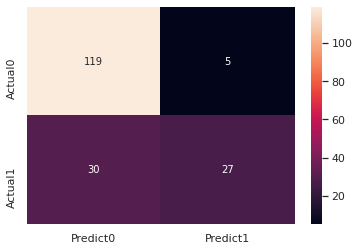

In [ ]:
#plot confusion matrix
sns.heatmap(cm02, annot=True, fmt='g')
plt.show()

#### * Check the output by using `sklearn.metrics.accuracy_score`


In [ ]:
# calculate accuracy score
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(df['class'], df['scored.class'])
print('Accuracy classification score:', accuracy_score)
print('the Accuracy in our built function', func_accuracy)

Accuracy classification score: 0.8066298342541437
the Accuracy in our built function 0.8066298342541437


#### * Check the output by using `sklearn.metrics.precision_score`

In [ ]:
# calculate precision
from sklearn.metrics import precision_score

precision = precision_score(df['class'], df['scored.class'], average='binary')
print('Precision:', precision)
print('the Precision in our built function', func_precision)

Precision: 0.84375
the Precision in our built function 0.84375


#### * Check the output by using `sklearn.metrics.recall_score`

In [ ]:
# calculate sensitivity
from sklearn.metrics import recall_score

recall = recall_score(df['class'], df['scored.class'], average='binary')
print('Sensitivity:', recall)
print('the Sensitivity in our built function', func_sensitivity)

Sensitivity: 0.47368421052631576
the Sensitivity in our built function 0.47368421052631576


#### * Check the output by using `sklearn.metrics.f1_score`

In [ ]:
# calculate f1 score
from sklearn.metrics import f1_score

f1 = f1_score(df['class'], df['scored.class'])
print('F1 score:', f1)
print('the f1 score in our built function', func_f1score)

F1 score: 0.6067415730337079
the f1 score in our built function 0.6067415730337079


#### * create classification report using the metrics.classification_report() function

In [ ]:
# import accuracy_score library
from sklearn.metrics import classification_report


# use class,scored.classdata to create a metrics.classification_report()
report = classification_report(df['class'],df['scored.class'],output_dict=True)
# exchange array to dataframe
report2 = pd.DataFrame(report).transpose()
report2

,precision,recall,f1-score,support
0,0.798658,0.959677,0.871795,124.00000
1,0.843750,0.473684,0.606742,57.00000
accuracy,0.806630,0.806630,0.806630,0.80663
macro avg,0.821204,0.716681,0.739268,181.00000
weighted avg,0.812858,0.806630,0.788325,181.00000


#### Findings:
>1.Comparing the results from the scikit-learn library with those of the functions we’ve created, we can see that the results from two methods are the same. 

>2.Both of the Accuracy classification score is 0.8066298342541437, Precision is 0.84375, Sensitivity is 0.47368421052631576, and F1 score is 0.6067415730337079, which proves that our functions are correct.

***
### 10) Create a python function to plot a ROC curve and also calculate AUC 

Reference: 
https://ethen8181.github.io/machine-learning/model_selection/auc/auc.html


#### Step 01: Calculate tps, fps, and thresholds
1.Calculate true and false positives per binary classification threshold. The calcuation makes the assumption that the positive case will always be labeled as 1.
 
2.Parameters: 

    y_true : true targets/labels of binary classification
    y_score : the classification model’s probability scores
       
3.Returns:

    tps : 1d ndarray
        True positives counts, index i records the number
        of positive samples that got assigned a
        score >= thresholds[i].
        The total number of positive samples is equal to
        tps[-1] (thus false negatives are given by tps[-1] - tps)

    fps : 1d ndarray
        False positives counts, index i records the number
        of negative samples that got assigned a
        score >= thresholds[i].
        The total number of negative samples is equal to
        fps[-1] (thus true negatives are given by fps[-1] - fps)

    thresholds : 1d ndarray
        Predicted score sorted in decreasing order

In [ ]:
def _binary_clf_curve(y_true, y_score):
    # sort predicted scores in descending order
    # and also reorder corresponding truth values
    desc_score_indices = np.argsort(y_score)[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]

    # y_score typically consists of tied values. Here we extract
    # the indices associated with the distinct values. We also
    # concatenate a value for the end of the curve
    distinct_indices = np.where(np.diff(y_score))[0]
    end = np.array([y_true.size - 1])
    threshold_indices = np.hstack((distinct_indices, end))

    thresholds = y_score[threshold_indices]
    tps = np.cumsum(y_true)[threshold_indices]

    # (1 + threshold_indices) = the number of positives
    # at each index, thus number of data points minus true
    # positives = false positives
    fps = (1 + threshold_indices) - tps
    return tps, fps, thresholds

#### Step 02: Calculate AUC 

1.Compute Area Under the Curve (AUC) from prediction scores

2.Parameters:

     y_true : 1d ndarray, shape = [n_samples]
     True targets/labels of binary classification

     y_score : 1d ndarray, shape = [n_samples]
     Estimated probabilities or scores

3.Returns:

     auc : float
 

In [ ]:
def _roc_auc_score(y_true, y_score):
    # ensure the target is binary
    if np.unique(y_true).size != 2:
        raise ValueError('Only two class should be present in y_true. ROC AUC score '
                         'is not defined in that case.')
    
    tps, fps, _ = _binary_clf_curve(y_true, y_score)

    # convert count to rate
    tpr = tps / tps[-1]
    fpr = fps / fps[-1]

    # compute AUC using the trapezoidal rule;
    # appending an extra 0 is just to ensure the length matches
    zero = np.array([0])
    tpr_diff = np.hstack((np.diff(tpr), zero))
    fpr_diff = np.hstack((np.diff(fpr), zero))
    auc = np.dot(tpr, fpr_diff) + np.dot(tpr_diff, fpr_diff) / 2
    return auc

#### Step 03: Plot ROC curve

In [ ]:
def plot_roc_curve(y_true, y_score):
    # convert count to rate, append 0 to
    # both true positive and false positive
    # so the visualization will start from origin (0, 0)
    tpr = np.hstack((0, tps / tps[-1]))
    fpr = np.hstack((0, fps / fps[-1]))
    plt.plot(fpr, tpr, color='orange', label='AUC=%0.2f'%auc_score)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Figure01: Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

#### Step 04: Work with our data

In [ ]:
# set up data
y_true = np.array(df['class'])
y_score = np.array(df['scored.probability'])

auc score: 0.8503112620260328


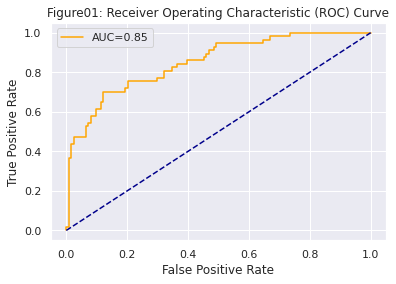

In [ ]:
# Step01: Calculate tps, fps, and thresholds
tps, fps, thresholds = _binary_clf_curve(y_true, y_score)

# Step 02: Calculate AUC 
auc_score = _roc_auc_score(y_true, y_score)
print('auc score:', auc_score)

# Step 03: Plot ROC curve
plot_roc_curve(y_true, y_score)


***
### 13) Using scikit-learn package  to generate a ROC plot and calculate AUC

**a. Using `metrics.auc()` to calculate AUC**

In [ ]:
from sklearn.metrics import roc_auc_score

# confirm with scikit-learn's result
auc = roc_auc_score(df['class'], df['scored.probability'])
print('package auc socre:', auc_score)

package auc socre: 0.8503112620260328


**b. Using `sklearn.metrics.roc_curve` to generate a ROC plot**

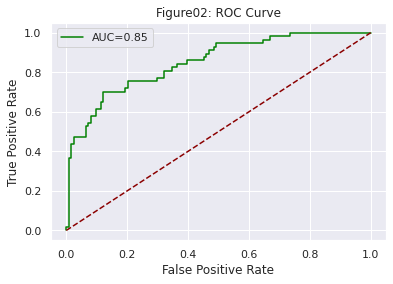

In [ ]:
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr00, tpr00, color='green', label='AUC=%0.2f'%auc)
    plt.plot([0, 1], [0, 1], color='darkred', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Figure02: ROC Curve')
    plt.legend()
    plt.show()

fpr00, tpr00, thresholds = roc_curve(df['class'], df['scored.probability'])

plot_roc_curve(fpr00, tpr00)


#### Findings:
>1. Figure01 was generated by using the function. Figure02 was generated by using scikit-learn package. 
>2. These two figures look the same. 
>3. The AUC score calculated by the function is 0.8503112620260328, which is the same as the AUC socre calculated by scikit-learn package.